
# MODELO DE REGRESIÓN MÚLTIPLE
* Rojas Ramírez Diego Andrés










# Descripción del modelo:

* El modelo es un conjunto de datos que se ha creado a partir de la recopilación de información sobre la salud y los factores relacionados de 193 países. Los datos han sido obtenidos de la página web de Global Health Observatory (GHO) de la Organización Mundial de la Salud (OMS), así como de la página web de Naciones Unidas. Se han seleccionado aquellos factores críticos más representativos para su análisis. Se ha considerado un período de tiempo de 15 años, del 2000 al 2015, para poder observar la mejora en las tasas de mortalidad humana en los países en desarrollo.

* Se han encontrado algunos valores faltantes en los datos, principalmente en relación a la población, la hepatitis B y el PIB. Después de intentar obtener estos datos para algunos países, se decidió excluir aquellos países de los cuales no se pudo obtener la información. El conjunto de datos final está compuesto por 22 columnas y 2938 filas, y se divide en varias categorías amplias, tales como factores relacionados con la inmunización, factores de mortalidad, factores económicos y factores sociales. En resumen, el modelo es un conjunto de datos que se utiliza para analizar y comprender la situación de la salud y los factores relacionados en diversos países durante un período de 15 años.
---
* Los datos corresponden a un país específico en este caso, Afganistán(por poner un ejemplo), y a un año en particular, 2015. Se proporciona información sobre el estado del país, que se clasifica como "en desarrollo". Además, se muestra la esperanza de vida en años, la tasa de mortalidad de adultos, la cantidad de muertes infantiles por cada 1,000 habitantes, el consumo de alcohol por persona, el porcentaje del gasto en salud con respecto al Producto Interno Bruto (PIB), la cobertura de vacunación contra la hepatitis B, el número de casos reportados de sarampión por cada 1,000 habitantes, el índice de masa corporal (IMC), el número de muertes de menores de cinco años por cada 1,000 habitantes, la cobertura de vacunación contra la poliomielitis, el gasto total en salud como porcentaje del PIB, la cobertura de vacunación contra la difteria, la tasa de prevalencia del VIH/SIDA, el PIB del país, la población total del país, el porcentaje de población delgada (de 1 a 19 años y de 5 a 9 años), la composición de ingresos de los recursos y el nivel educativo promedio de la población en años.
---
Un modelo de regresión puede ayudar a:
* Predecir la relación entre la variable dependiente (en este caso, la esperanza de vida) y una o más variables independientes (como el consumo de alcohol, la tasa de mortalidad de adultos, el gasto en atención médica, etc.) que pueden estar afectando la esperanza de vida.
* Identificar qué variables tienen un impacto significativo en la esperanza de vida y cómo afectan su valor.
* Predecir la esperanza de vida en una población determinada en función de los valores de las variables independientes, lo que puede ayudar a planificar y mejorar la atención médica y otros factores relacionados con la salud en esa población.
---
Si Life Expectancy es la variable objetivo o variable Y, podemos decir que el objetivo del modelo de regresión sería predecir el valor de Life Expectancy para un conjunto de valores de las variables predictoras (variables X).
* En otras palabras, el modelo buscará encontrar una relación matemática entre Life Expectancy y las variables predictoras para poder hacer predicciones de Life Expectancy en función de los valores

#  Sustento metodológico
El modelo utilizado para analizar los datos tiene sustento metodológico porque se basa en la regresión lineal múltiple, una técnica estadística ampliamente utilizada para modelar la relación entre una variable dependiente (en este caso, **la esperanza de vida**) y múltiples variables independientes (los factores predictivos seleccionados)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest,VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from numpy.core.fromnumeric import var
from scipy import stats
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!pwd

/content


In [33]:
df = pd.read_csv('/content/drive/My Drive/DB´s/Life Expectancy Data.csv')

In [34]:
df.head(20) # mostramos los 20 primeros datos

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


## Convertimos la variable 'Country' , de categórica a numérica

In [35]:
## Obtenemos los países que contiene el dataframe
paises=df['Country'].unique()
len(paises)

193

In [36]:
## Creamos un diccionario con los países y les indexamos un número
country_dict = {}
for i, paises in enumerate(paises):
    country_dict[paises] = i + 1

print(country_dict)

{'Afghanistan': 1, 'Albania': 2, 'Algeria': 3, 'Angola': 4, 'Antigua and Barbuda': 5, 'Argentina': 6, 'Armenia': 7, 'Australia': 8, 'Austria': 9, 'Azerbaijan': 10, 'Bahamas': 11, 'Bahrain': 12, 'Bangladesh': 13, 'Barbados': 14, 'Belarus': 15, 'Belgium': 16, 'Belize': 17, 'Benin': 18, 'Bhutan': 19, 'Bolivia (Plurinational State of)': 20, 'Bosnia and Herzegovina': 21, 'Botswana': 22, 'Brazil': 23, 'Brunei Darussalam': 24, 'Bulgaria': 25, 'Burkina Faso': 26, 'Burundi': 27, "Côte d'Ivoire": 28, 'Cabo Verde': 29, 'Cambodia': 30, 'Cameroon': 31, 'Canada': 32, 'Central African Republic': 33, 'Chad': 34, 'Chile': 35, 'China': 36, 'Colombia': 37, 'Comoros': 38, 'Congo': 39, 'Cook Islands': 40, 'Costa Rica': 41, 'Croatia': 42, 'Cuba': 43, 'Cyprus': 44, 'Czechia': 45, "Democratic People's Republic of Korea": 46, 'Democratic Republic of the Congo': 47, 'Denmark': 48, 'Djibouti': 49, 'Dominica': 50, 'Dominican Republic': 51, 'Ecuador': 52, 'Egypt': 53, 'El Salvador': 54, 'Equatorial Guinea': 55, 'E

In [37]:
## Sustituimos el nombre de los países por el número indexado
df['Country'] = df['Country'].map(country_dict)

## Convertimos la variable 'Status' de categórica a dummy

In [38]:
## Obtenemos las variables status
status=df['Status'].unique()
status

array(['Developing', 'Developed'], dtype=object)

In [39]:
## Creamos un diccionario de los status y les indexamos un número
status_dict = {}
for i, status in enumerate(status):
    status_dict[status] = i + 1

print(status_dict)

{'Developing': 1, 'Developed': 2}


In [40]:
## Sustituimos el status por el número indexado
df['Status'] = df['Status'].map(status_dict)

In [41]:
## Vemos como quedó el Data Frame
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


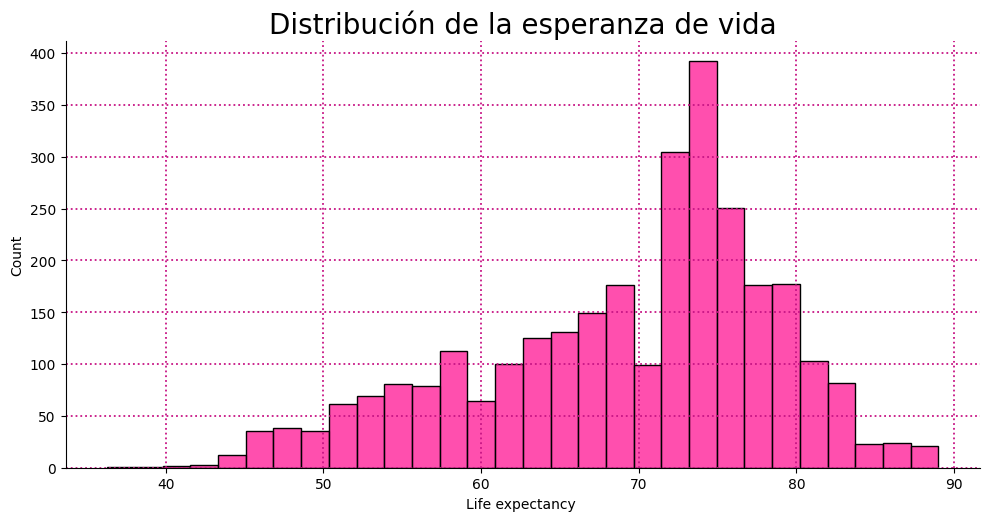

In [42]:
## Gráfica de la esperanza de vida
sns.displot(df['Life expectancy '], palette= 'dark', color="deeppink", kde=False, height=5, aspect=2)
plt.title('Distribución de la esperanza de vida', fontsize=20)
plt.grid(color='mediumvioletred', linestyle='dotted',linewidth=1.3)

**En la gráfica anterior podemos ver que la esperanza de vida puede estar entre los 70 y 80 años de edad que es donde se concentran los mayores datos en el conteo, siguiendo el sentido demografico podemos observar que hay una elevada esperanza de vida y por ende intuimos que en determinando momento en todos los paises altamente desarrollados tendran una poblacion envejecida.**

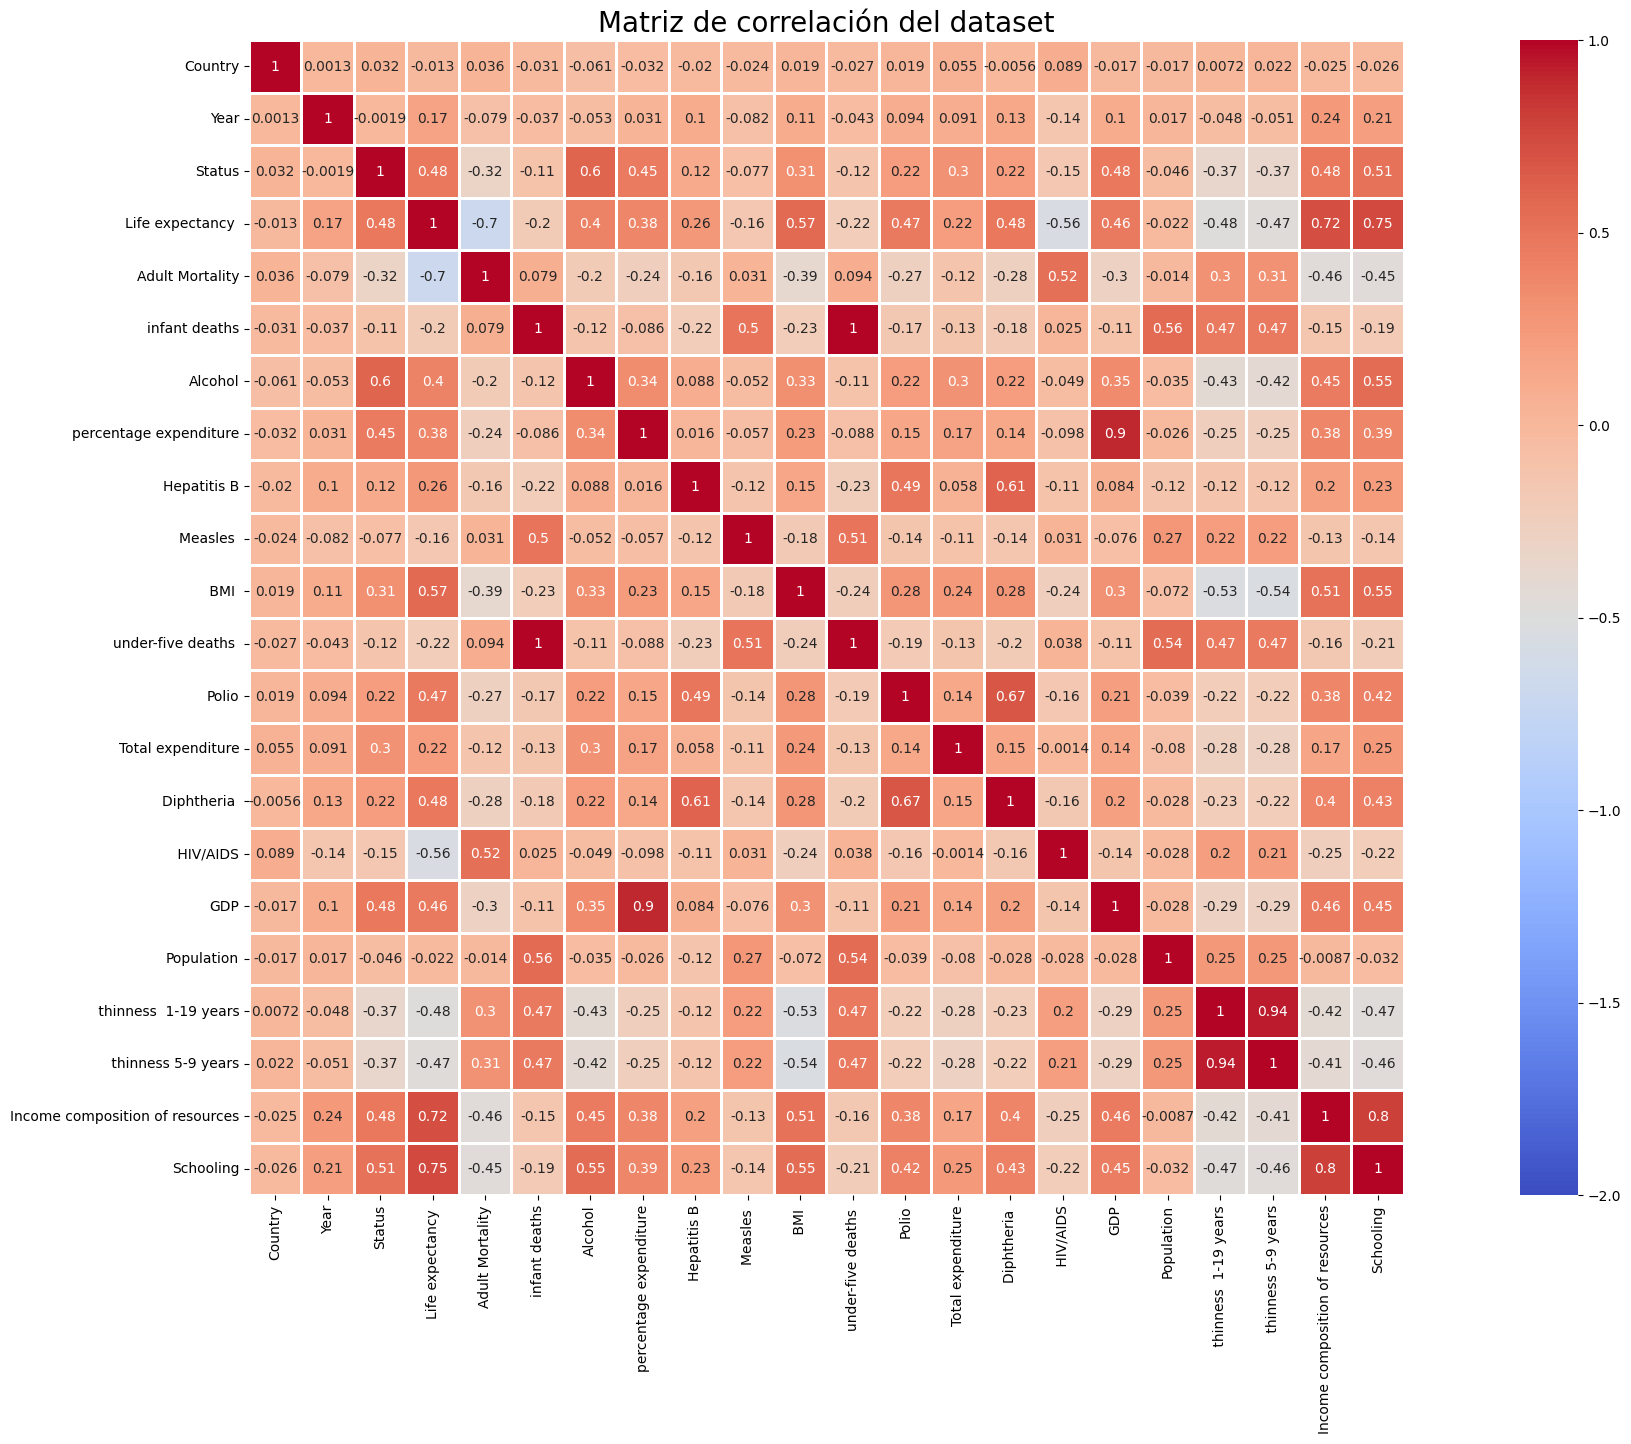

In [43]:
## Veamos la correlación de las variables con un mapa de calor
corr=df.corr()
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-2, vmax=1, square=True, linewidths=1, linecolor='white', ax=ax)
ax.set_title('Matriz de correlación del dataset', fontsize=20)
plt.show()

## Análisis Exploratorio

## Ausentes

In [44]:
## Analizamos las variables con mayor porcentaje de registros nulos
miss=pd.Series(df.isnull().sum()/len(df)).sort_values(ascending=False).to_frame()
miss
## Resulta ser que sólo la columna Population, tiene un porcentaje mayor a 20% de missings

,0
Population,0.221920
Hepatitis B,0.188223
GDP,0.152485
Total expenditure,0.076923
Alcohol,0.066031
Income composition of resources,0.056841
Schooling,0.055480
thinness 5-9 years,0.011572
thinness 1-19 years,0.011572
BMI,0.011572


In [45]:
##ELiminamos las columnas con un porcentaje mayor a 20%
miss.columns=['miss']
fuera=list(miss[miss['miss']>0.2].index)
df=df.drop(fuera,axis=1)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,1,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,1,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,1,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [46]:
## Imputamos la mediana para los missings
im = SimpleImputer(strategy = 'median')
im.fit(df)
df1 = pd.DataFrame(im.transform(df),columns = df.columns)

In [47]:
## Verificamos que ya no tenemos valores ausentes
miss1=pd.Series(df1.isnull().sum()/len(df1)).sort_values(ascending=False).to_frame()
miss1

,0
Country,0.0
under-five deaths,0.0
Income composition of resources,0.0
thinness 5-9 years,0.0
thinness 1-19 years,0.0
GDP,0.0
HIV/AIDS,0.0
Diphtheria,0.0
Total expenditure,0.0
Polio,0.0


In [48]:
## Verficamos que la imputación no haya afectado la distribución de las variables
## Prueba de bondad de ajuste , (Kolmogorov Smirnov)
## Si el estadístico ks > 0.1 ,se considera que la distribución fue afectada por la imputación , son diferentes las distribuciones
ks = pd.DataFrame(map(lambda v:(v,stats.ks_2samp(df1[v],df[v].dropna()).statistic),df.columns),columns=['var','ks']).sort_values('ks',ascending=False)
ks
## Observamos que ninguna superó el límite , por lo que mantenemos todas

,var,ks
8,Hepatitis B,0.090679
16,GDP,0.076242
13,Total expenditure,0.038462
6,Alcohol,0.033016
19,Income composition of resources,0.028390
20,Schooling,0.027690
10,BMI,0.005782
18,thinness 5-9 years,0.005778
17,thinness 1-19 years,0.005766
14,Diphtheria,0.003190


## Varianza

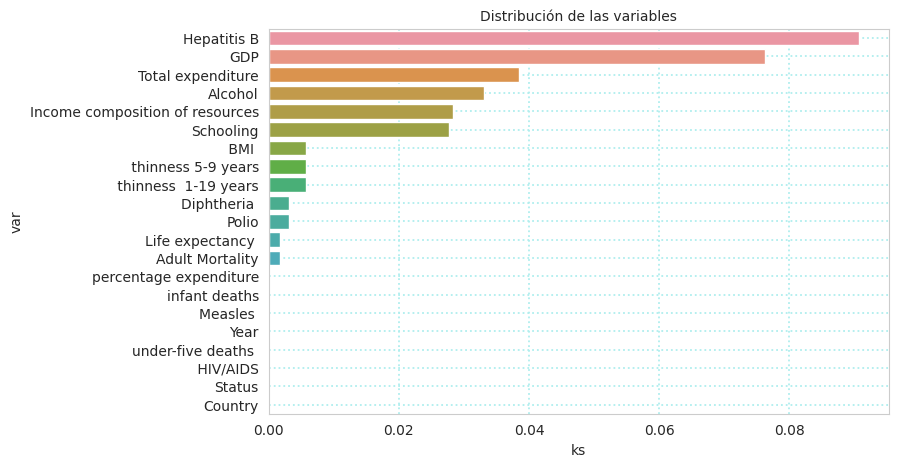

In [49]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='ks', y='var', data=ks, ax=ax, orient="h")
plt.title('Distribución de las variables', fontsize=10)
plt.grid(color='paleturquoise', linestyle='dotted',linewidth=1.3)

In [50]:
vt = VarianceThreshold()
vt.fit(df)

VarianceThreshold()

In [51]:
## Obtenemos las varianzas de las variables
vt.variances_

array([1.92000000e+02, 1.50000000e+01, 1.43898801e-01, 9.06730738e+01,
       1.54432448e+04, 1.80000000e+03, 1.64160636e+01, 1.94799116e+04,
       6.28242157e+02, 2.12183000e+05, 4.01624931e+02, 2.50000000e+03,
       5.48685302e+02, 6.23929971e+00, 5.62299218e+02, 2.57751197e+01,
       2.03555951e+08, 1.95313954e+01, 2.03230170e+01, 4.44642575e-02,
       1.12782760e+01])

In [52]:
##Las Ordenamos , y vemos que 2 variables tienen varianza muy cercana a cero, y la tercera menor es de varianza 6
pd.Series(vt.variances_).sort_values()

19    4.446426e-02
2     1.438988e-01
13    6.239300e+00
20    1.127828e+01
1     1.500000e+01
6     1.641606e+01
17    1.953140e+01
18    2.032302e+01
15    2.577512e+01
3     9.067307e+01
0     1.920000e+02
10    4.016249e+02
12    5.486853e+02
14    5.622992e+02
8     6.282422e+02
5     1.800000e+03
11    2.500000e+03
4     1.544324e+04
7     1.947991e+04
9     2.121830e+05
16    2.035560e+08
dtype: float64

In [53]:
## Obtenemos las variables con varianza muy cercana a 0
fuera = list(df1.columns[vt.variances_ < 6])
fuera

['Status', 'Income composition of resources']

In [54]:
# df1 = df1.drop(['Life expectancy '], axis = 1)

In [55]:
## Eliminamos las 2 variables
df1 = df1.drop(fuera, axis = 1)

In [56]:
## Verificamos que fueron eliminadas
df1.shape

(2938, 19)

In [57]:
## Observamos que ya fue eliminada , y aún tenemos 19 variables descriptivas
df1.shape

(2938, 19)

## Multicolinealidad

In [58]:
pip install varclushi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.4 MB/s eta 0:00:00


In [59]:
from varclushi import VarClusHi

In [60]:
df1.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Schooling'],
      dtype='object')

In [61]:
## La función varclus() del objeto VarClusHi realiza el análisis de clustering de variables. El análisis de clustering de variables se utiliza
## para agrupar variables que tienen una alta correlación entre sí en clusters (grupos) con el objetivo de reducir la dimensionalidad de
## los datos y mejorar la interpretación de los resultados.
vc = VarClusHi(df = df1.drop('Life expectancy ', axis = 1),feat_list = df1.drop('Life expectancy ', axis = 1).columns).varclus()

In [62]:
## El valor de R-squared representa la proporción de varianza de cada variable que se explica por el cluster al que pertenece.
vc.rsquare
## Obtenemos que para explicar el modelo solo necesitamos 7 variables
## Buscamos la variable con un valor de RS_Ratio más chico de cada cluster

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Hepatitis B,0.496919,0.025482,0.516236
1,0,Polio,0.723081,0.139318,0.321744
2,0,Diphtheria,0.784516,0.145452,0.252162
3,1,infant deaths,0.929267,0.225534,0.091331
4,1,Measles,0.506131,0.051290,0.520570
5,1,under-five deaths,0.933145,0.226793,0.086464
6,2,percentage expenditure,0.950910,0.104322,0.054808
7,2,GDP,0.950910,0.146829,0.057539
8,3,BMI,0.507399,0.296224,0.699940
9,3,Adult Mortality,0.625054,0.092133,0.412997


In [63]:
## Obtenemos las 7 variables con el RS_Ratio más pequeño
variables = vc.rsquare.sort_values(by=['Cluster','RS_Ratio']).groupby('Cluster').first()
Xi=list(variables['Variable'])
Xi

['Diphtheria ',
 'under-five deaths ',
 'percentage expenditure',
 'Adult Mortality',
 ' thinness  1-19 years',
 'Total expenditure',
 'Country']

In [64]:
# Nos quedamos con las variales continuas y las mejores que obtuvimos
varc = Xi
df2 = df1[varc + ['Life expectancy ']]
df2

,Diphtheria,under-five deaths,percentage expenditure,Adult Mortality,thinness 1-19 years,Total expenditure,Country,Life expectancy
0,65.0,83.0,71.279624,263.0,17.2,8.16,1.0,65.0
1,62.0,86.0,73.523582,271.0,17.5,8.18,1.0,59.9
2,64.0,89.0,73.219243,268.0,17.7,8.13,1.0,59.9
3,67.0,93.0,78.184215,272.0,17.9,8.52,1.0,59.5
4,68.0,97.0,7.097109,275.0,18.2,7.87,1.0,59.2
...,...,...,...,...,...,...,...,...
2933,65.0,42.0,0.000000,723.0,9.4,7.13,193.0,44.3
2934,68.0,41.0,0.000000,715.0,9.8,6.52,193.0,44.5
2935,71.0,40.0,0.000000,73.0,1.2,6.53,193.0,44.8
2936,75.0,39.0,0.000000,686.0,1.6,6.16,193.0,45.3


## Valores Extremos

array([[<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': ' thinness  1-19 years'}>],
       [<Axes: title={'center': 'Total expenditure'}>,
        <Axes: title={'center': 'Country'}>, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

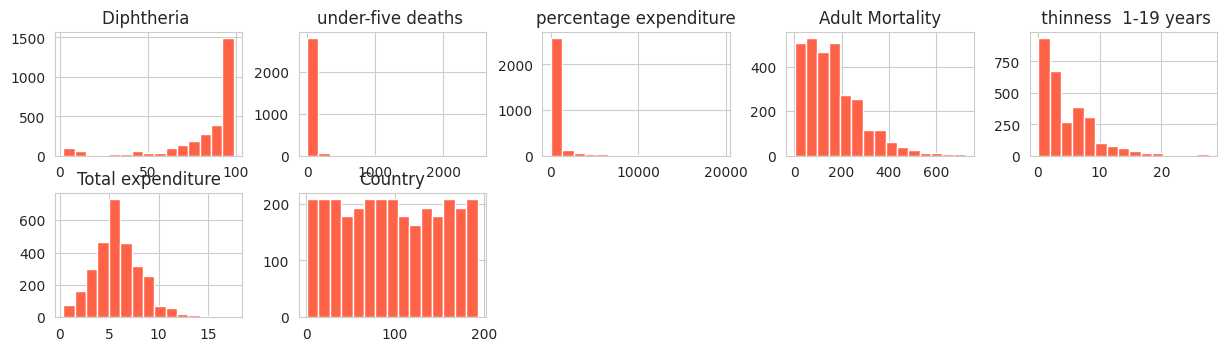

In [65]:
## Observamos las distribuciones de las variables Xi
df2[varc].hist(bins = 15, figsize = (15, 10), layout = (5, 5), color= 'tomato', alpha = 1)

<Axes: >

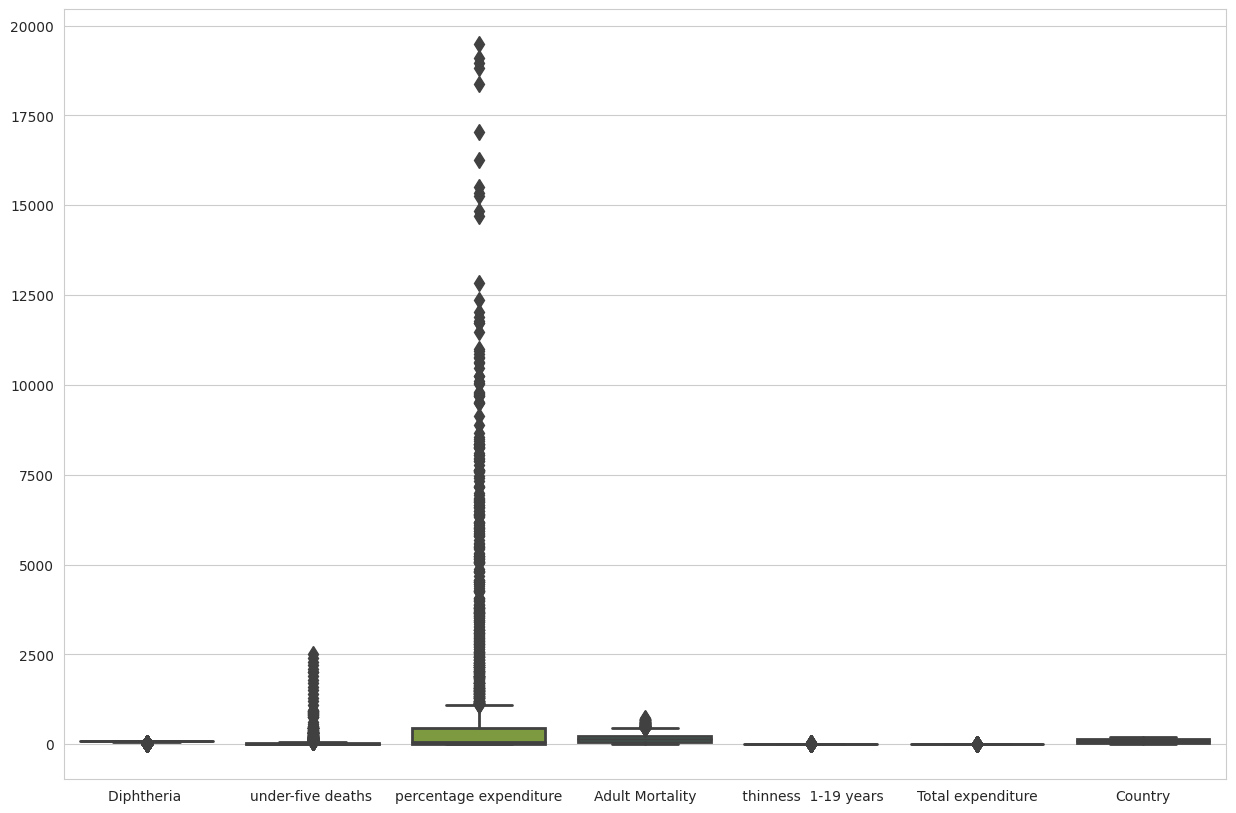

In [66]:
## Gráfica de caja de las variables seleccionadas
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df2[varc], palette="husl", linewidth=2, fliersize=8, ax=ax)


Text(0.5, 0, 'percentage expenditure')

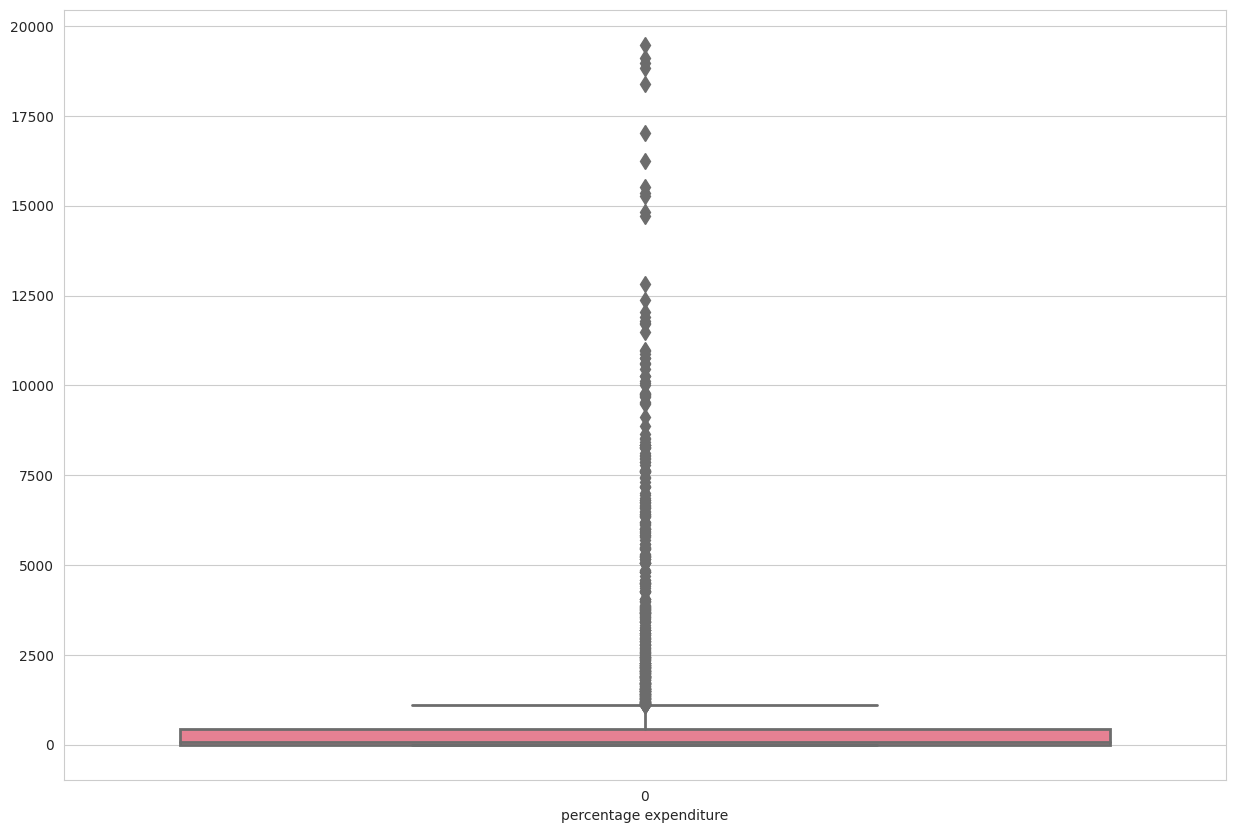

In [67]:
## Gráfica de caja percentage expenditure
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df2['percentage expenditure'], palette="husl", linewidth=2, fliersize=8, ax=ax)
plt.xlabel('percentage expenditure')

In [68]:
## Observamos que la variable "Percentage Expenditure" tiene demasiados outliers, con lo que decidimos cambiarla por la segúnda mejor opción
## que pertenezca a su mismo cluster ,que resulta ser GDP
varc.remove('percentage expenditure')

In [69]:
## Agregamos GPD a la lista varc
varc.append('GDP')

In [70]:
df1 = df1[varc + ['Life expectancy ']]
df1

,Diphtheria,under-five deaths,Adult Mortality,thinness 1-19 years,Total expenditure,Country,GDP,Life expectancy
0,65.0,83.0,263.0,17.2,8.16,1.0,584.259210,65.0
1,62.0,86.0,271.0,17.5,8.18,1.0,612.696514,59.9
2,64.0,89.0,268.0,17.7,8.13,1.0,631.744976,59.9
3,67.0,93.0,272.0,17.9,8.52,1.0,669.959000,59.5
4,68.0,97.0,275.0,18.2,7.87,1.0,63.537231,59.2
...,...,...,...,...,...,...,...,...
2933,65.0,42.0,723.0,9.4,7.13,193.0,454.366654,44.3
2934,68.0,41.0,715.0,9.8,6.52,193.0,453.351155,44.5
2935,71.0,40.0,73.0,1.2,6.53,193.0,57.348340,44.8
2936,75.0,39.0,686.0,1.6,6.16,193.0,548.587312,45.3


<Axes: >

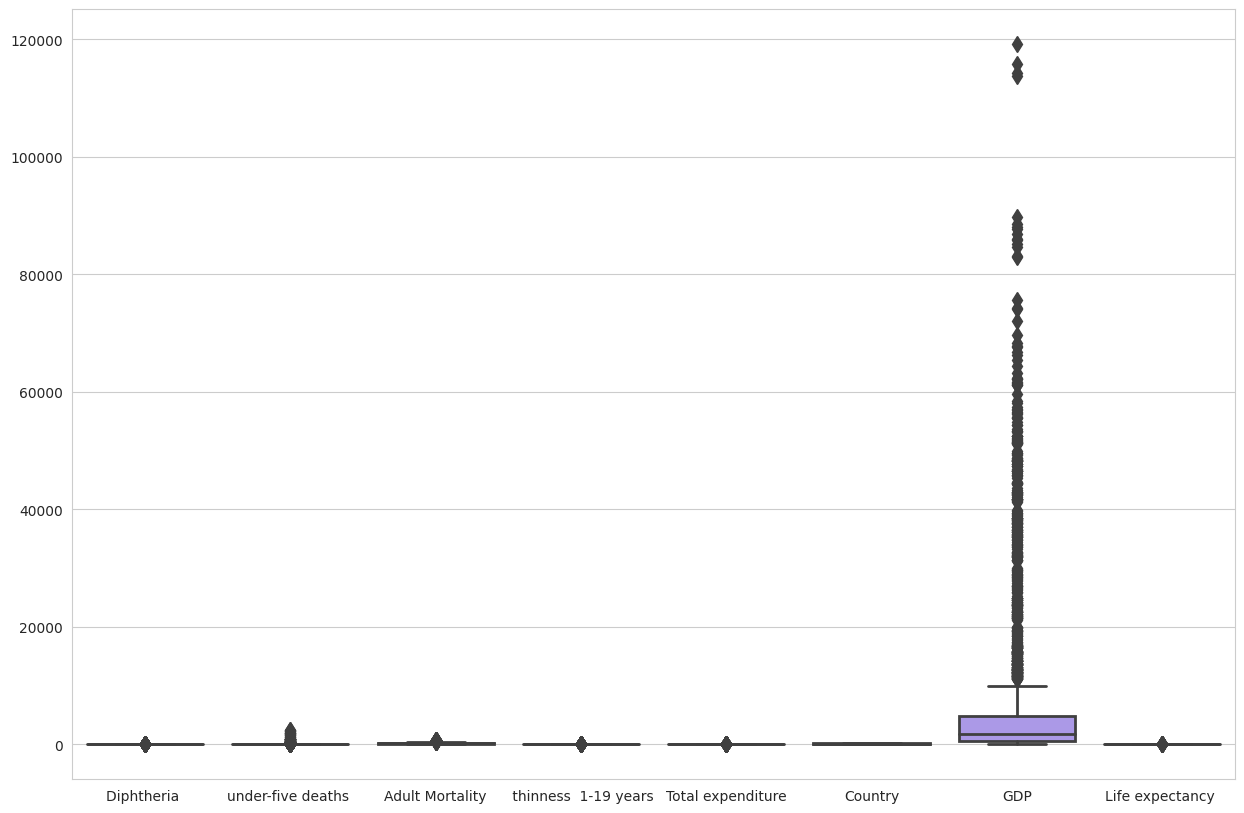

In [71]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df1, palette="husl", linewidth=2, fliersize=8, ax=ax)

# Limpieza de Datos para eliminar datos extremos

In [72]:
# Se utiliza un bucle for para iterar a través de cada variable v en el DataFrame X[varc].
# Para cada variable, se calculan los percentiles 1 y 99 utilizando el método describe() de pandas y se almacenan en las variables li y ls, respectivamente.
for v,li,ls in df1[varc].describe(percentiles=[0.01,0.99]).T[['1%', '99%']].reset_index().values:
    df1[f'ex_{v}'] = ((df1[v]<li)|(df1[v]>ls)).astype(int)
# Se crea una nueva columna en el DataFrame X llamada ex_ que contiene el valor máximo de todas las columnas del DataFrame que comienzan con el prefijo ex_.
# Esta columna indica si alguna de las variables originales estaba por debajo del percentil 1 o por encima del percentil 99.
df1['ex_'] = df1.filter(regex='^ex_').max(axis=1)
df1['ex_'].value_counts(1)
#Se filtra el DataFrame X para eliminar los registros que se identificaron en el paso anterior como fuera de los límites de los percentiles.
# Luego, restablece los índices de fila a valores secuenciales y elimina la columna
df1 = df1[df1['ex_']==0].reset_index(drop=True)
df1 = df1.drop(df1.filter(regex='^ex_').columns, axis=1)

<Axes: >

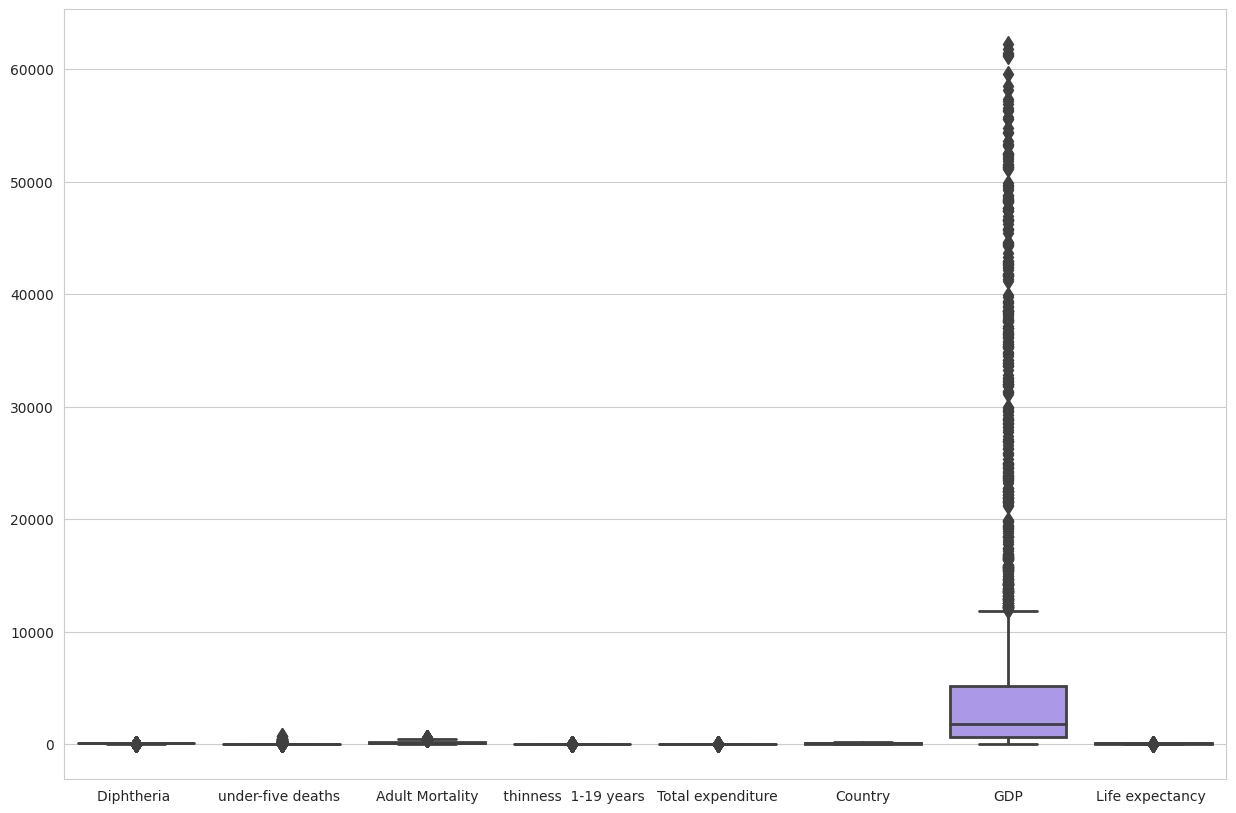

In [73]:
## Seguimos observando que la variables "GDP" sigue teniendo demasiados outliers, por lo tanto decidimos quitar dicha variable para
## no afectar al modelo
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df1, palette="husl", linewidth=2, fliersize=8, ax=ax)

In [74]:
##Eliminamos la variable "GDP"
varc.remove('GDP')

# Variable Target ($Y$) y Variables Features $X_i$

## Variables Predictoras $X_i$

In [75]:
## Obtenemos la tabla con los features y la target
df1 = df1[varc + ['Life expectancy ']]
df1

,Diphtheria,under-five deaths,Adult Mortality,thinness 1-19 years,Total expenditure,Country,Life expectancy
0,99.0,0.0,74.0,1.2,6.00,2.0,77.8
1,98.0,1.0,8.0,1.2,5.88,2.0,77.5
2,99.0,1.0,84.0,1.3,5.66,2.0,77.2
3,99.0,1.0,86.0,1.3,5.59,2.0,76.9
4,99.0,1.0,88.0,1.4,5.71,2.0,76.6
...,...,...,...,...,...,...,...
2646,8.0,51.0,487.0,6.9,4.37,192.0,52.6
2647,82.0,55.0,554.0,7.1,7.56,192.0,49.3
2648,83.0,59.0,578.0,7.2,7.33,192.0,47.9
2649,83.0,62.0,64.0,7.3,8.18,192.0,46.4


In [76]:
X = df1.loc[:,varc]
X.head(10)

,Diphtheria,under-five deaths,Adult Mortality,thinness 1-19 years,Total expenditure,Country
0,99.0,0.0,74.0,1.2,6.00,2.0
1,98.0,1.0,8.0,1.2,5.88,2.0
2,99.0,1.0,84.0,1.3,5.66,2.0
3,99.0,1.0,86.0,1.3,5.59,2.0
4,99.0,1.0,88.0,1.4,5.71,2.0
5,99.0,1.0,91.0,1.4,5.34,2.0
6,98.0,1.0,91.0,1.5,5.79,2.0
7,98.0,1.0,9.0,1.6,6.10,2.0
8,97.0,1.0,99.0,1.7,5.86,2.0
9,98.0,1.0,15.0,1.8,6.12,2.0


## Variable Target(Y)

In [77]:
Y = df1['Life expectancy ']
Y.head(10)

0    77.8
1    77.5
2    77.2
3    76.9
4    76.6
5    76.2
6    76.1
7    75.9
8    74.2
9    73.5
Name: Life expectancy , dtype: float64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [79]:
train,valid = train_test_split(df1,test_size=0.3)

In [80]:
df1

,Diphtheria,under-five deaths,Adult Mortality,thinness 1-19 years,Total expenditure,Country,Life expectancy
0,99.0,0.0,74.0,1.2,6.00,2.0,77.8
1,98.0,1.0,8.0,1.2,5.88,2.0,77.5
2,99.0,1.0,84.0,1.3,5.66,2.0,77.2
3,99.0,1.0,86.0,1.3,5.59,2.0,76.9
4,99.0,1.0,88.0,1.4,5.71,2.0,76.6
...,...,...,...,...,...,...,...
2646,8.0,51.0,487.0,6.9,4.37,192.0,52.6
2647,82.0,55.0,554.0,7.1,7.56,192.0,49.3
2648,83.0,59.0,578.0,7.2,7.33,192.0,47.9
2649,83.0,62.0,64.0,7.3,8.18,192.0,46.4


In [81]:
rl = LinearRegression()
hp = {'fit_intercept':[True,False]}
gs = GridSearchCV(rl,hp,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=True)
gs.fit(train[X.columns],train['Life expectancy '])
gs.best_params_,gs.best_score_
rl = gs.best_estimator_
rl.fit(train[X.columns],train['Life expectancy '])
{'train':mean_absolute_percentage_error(train['Life expectancy '],rl.predict(train[X.columns])),
 'valid':mean_absolute_percentage_error(valid['Life expectancy '],rl.predict(valid[X.columns]))}

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'train': 0.05884213839036557, 'valid': 0.05840778019908649}

In [82]:
rl.coef_,rl.intercept_


(array([ 0.10445234, -0.02237007, -0.0403518 , -0.53615839,  0.10391687,
         0.00175406]),
 69.77439338854937)

## f. Tabla de resultados del modelo construido con la interpretación de los resultados de la regresión así como de los elementos de la tabla de summary()

In [83]:
columns_names = df.columns.values
cnnew = []
for name in columns_names:
  name = name.replace(" ", "_")
  cnnew.append(name)
sust_columns = {}
sust_columns.update( { key: value
                     for key, value in zip(columns_names, cnnew)})

In [84]:
## Renombramos las columnas para que no tengan espacio
df = df.rename(columns = sust_columns)
df.rename(columns = {'under-five_deaths_':'under_five_deaths', '_thinness__1-19_years' : 'thinness_1_19_years'}, inplace = True)
df

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,under_five_deaths,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,thinness_1_19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0,1,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,1,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,1,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,1,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,193,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,193,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,193,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,193,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [85]:
lmod = smf.ols(formula='Life_expectancy_ ~ Diphtheria_ + under_five_deaths + Adult_Mortality + thinness_1_19_years + Total_expenditure + Country', data=df).fit()
lmod.params

Intercept              68.340798
Diphtheria_             0.106642
under_five_deaths      -0.000200
Adult_Mortality        -0.041209
thinness_1_19_years    -0.504347
Total_expenditure       0.180711
Country                 0.002621
dtype: float64

In [86]:
print(lmod.summary())

                            OLS Regression Results                            
Dep. Variable:       Life_expectancy_   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     723.8
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:46:23   Log-Likelihood:                -8540.4
No. Observations:                2676   AIC:                         1.709e+04
Df Residuals:                    2669   BIC:                         1.714e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              68.3408    

Dep variable es nuestra variable dependiente, en este caso es life expectancy

Diphtheria, under five deaths, adult mortality, thinness 1-19 years total expenditure y country son las variables independientes

Df residual (2669) es igual al número de observaciones menos los grados de libertad menos 1

DF model (6) son los grados de libertad

R-squared explica que tanto de la variación en nuestra variable dependiente puede ser explicada por nuestras variables independientes, es decir, 61.9% de la variación en la esperanza de vida puede ser debido a las variables independientes seleccionadas

Prob(f-statistic) si la probabilidad es menor a 0.05 significa que hay al menos una variable independiente que está significativamente relacionada con la variable objetivo, en este caso obtenemos que es 0.00; quiere decir que al menos una de nuestras features está relacionada con nuestra variable objetivo (life expectancy)

La columna coef nos muestra los coeficientes de cada variable independiente y el intercepto

La columna std err nos muestra la desviación estándar de variable

La columna t corresponde al t-value, esta columna es usada para calcular la siguiente columna P>|t|

La columna P>|t| nos dice la probabilidad de que la variable independiende no tenga efecto en la variable dependiente; en nuestra tabla under five deaths tienen un porcentaje de 79.9% de no tener algún efecto life expectancy

Las columnas 0.025 y 0.975 nos muestran en que rango de valores se encuentra esa variable el 95% de las veces (0.975-0.025=0.95)


**Supuestos del Modelo de Regresión**


In [87]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(Y,X_constant).fit()


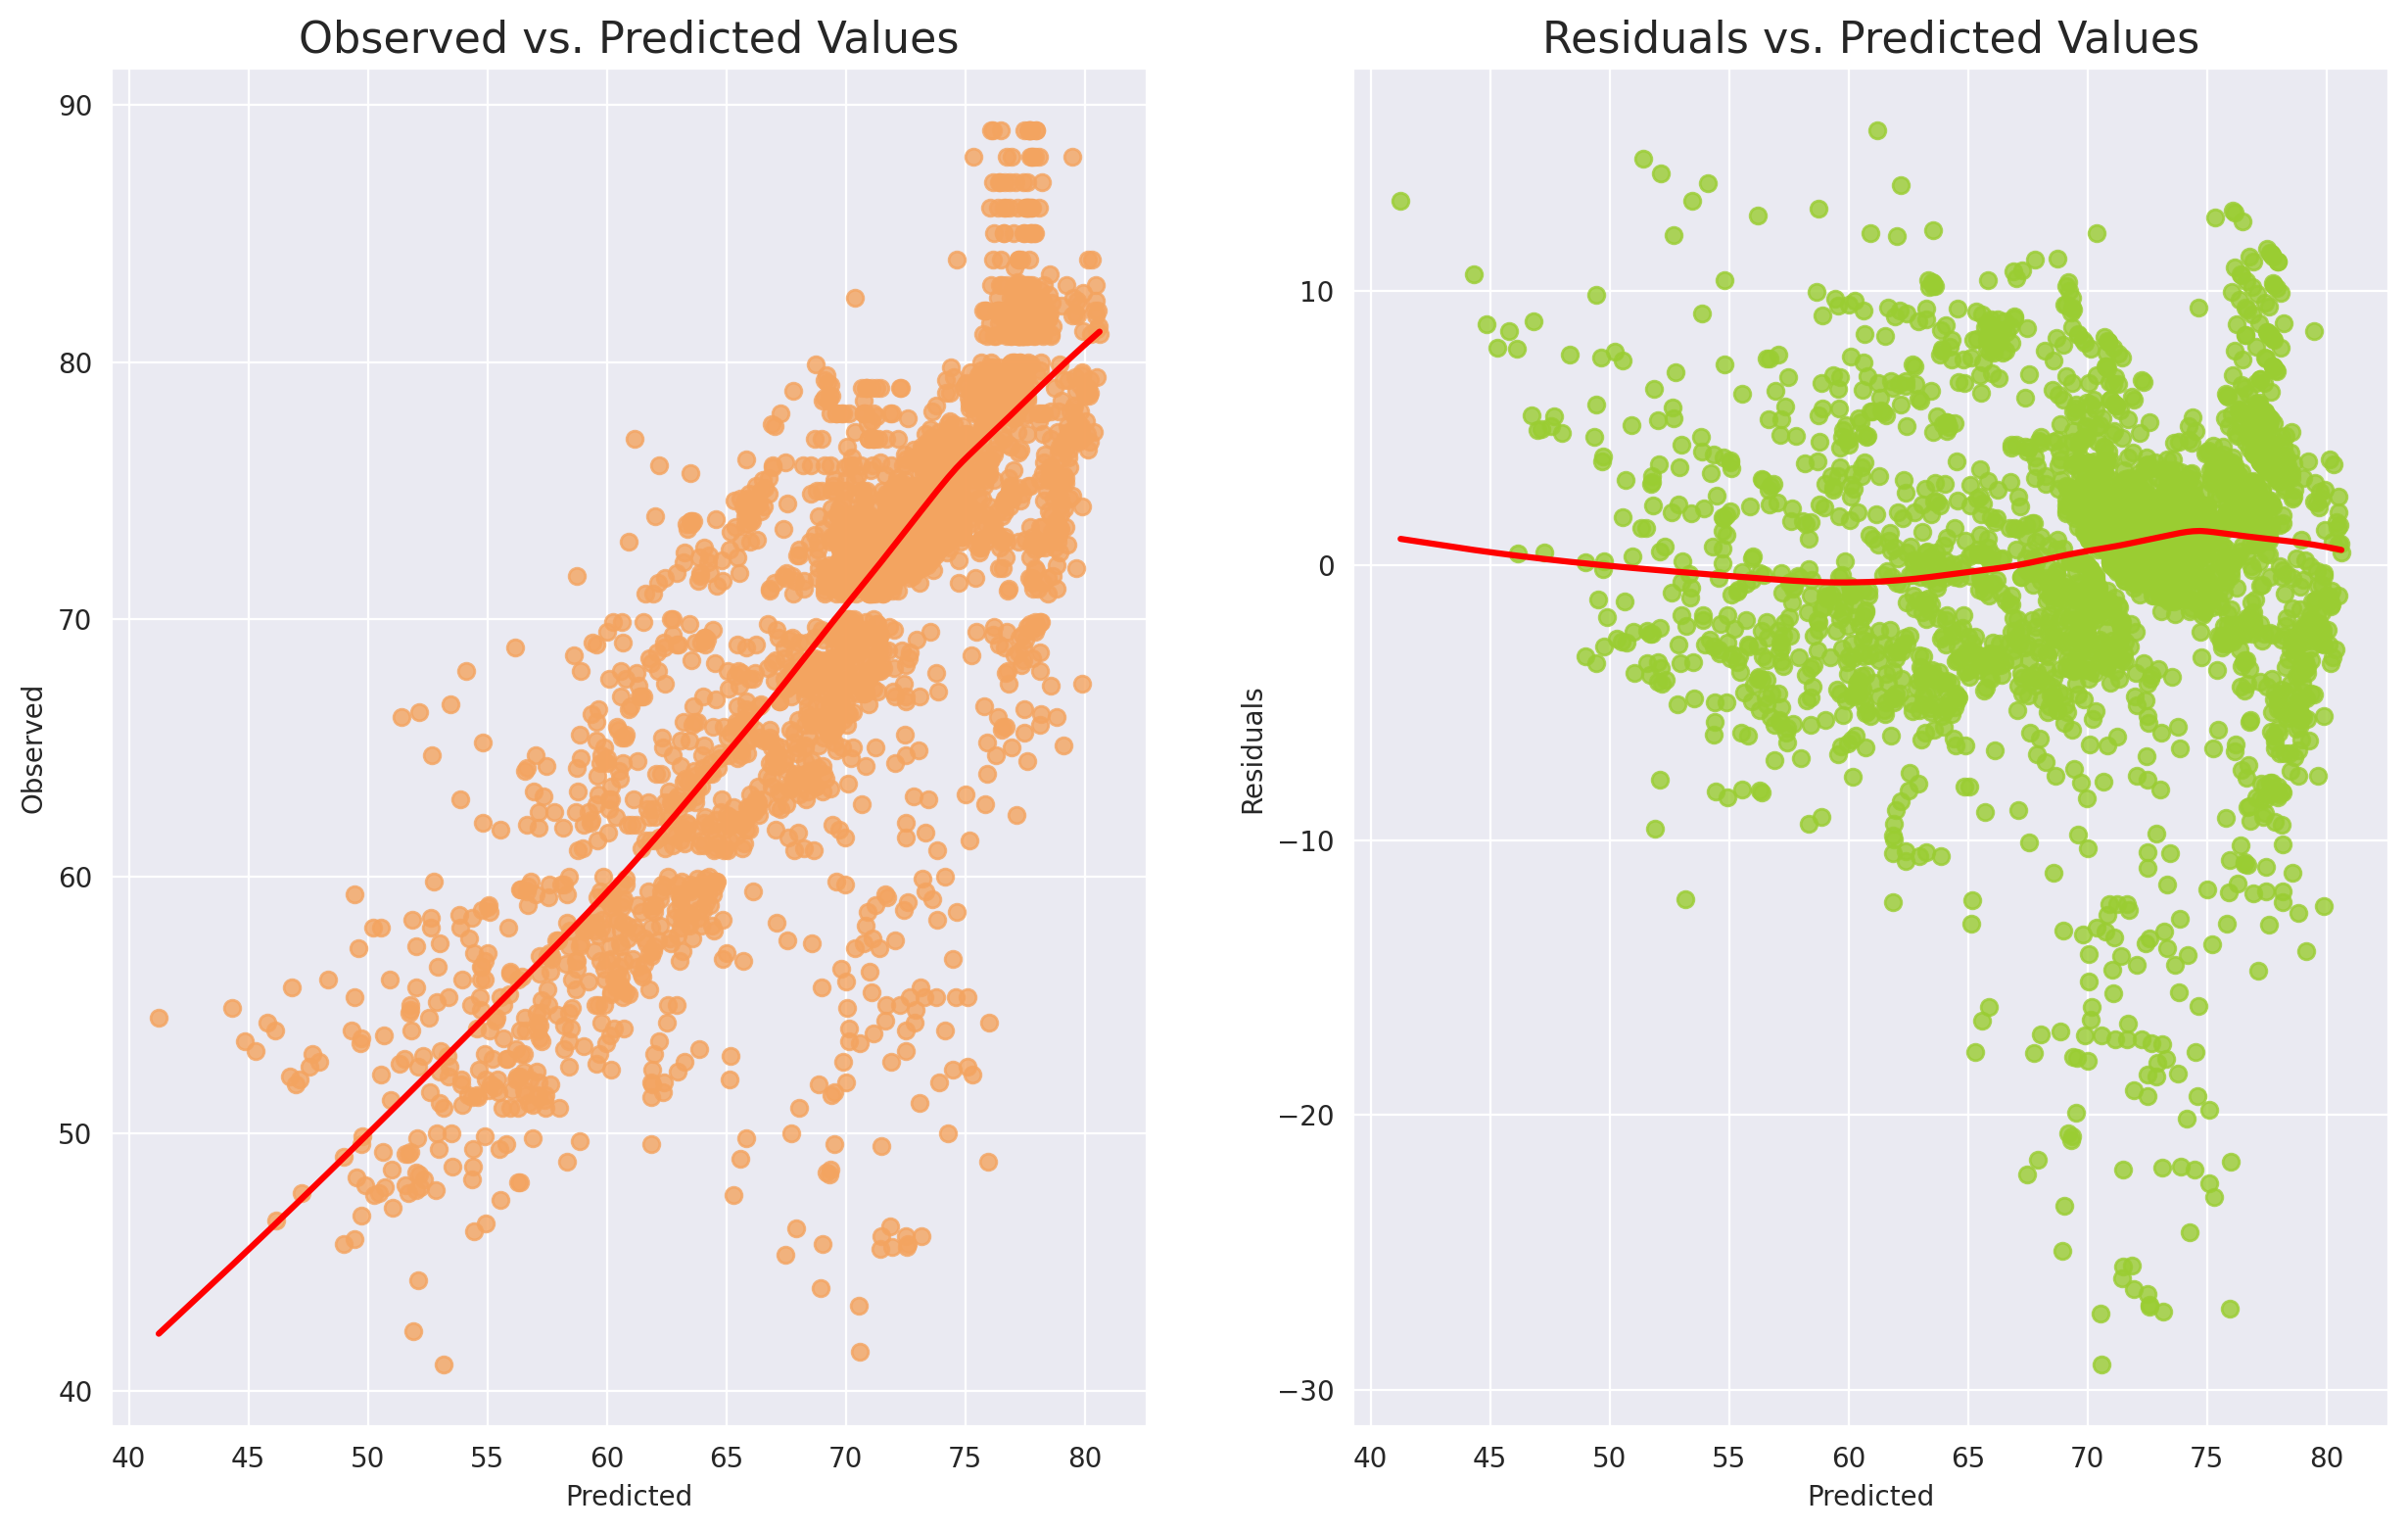

In [88]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

## Desarrollamos una función que va a tener como salidas dos gráficas
def linearity_test(model, Y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.

    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=Y, lowess=True, ax=ax[0], line_kws={'color': 'red'}, scatter_kws={'color': 'sandybrown'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'}, scatter_kws={'color': 'yellowgreen'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

linearity_test(lin_reg, Y)


### Observen que hay linealidad en los errores ni en las predicciones

In [89]:

#prueba de colinealidad por medio de Varaince Infaltion Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

#Observamos una colinealidad mínima (menor a 2)##

,Diphtheria,under-five deaths,Adult Mortality,thinness 1-19 years,Total expenditure,Country
vif,1.138924,1.147636,1.220087,1.239585,1.108916,1.009081



 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  4.157835e+02
p-value                        1.128700e-86
f-value                        8.197056e+01
f p-value                      2.453022e-94

 Goldfeld-Quandt test ----
                value
F statistic  1.218974
p-value      0.000164

 Residuals plots ----


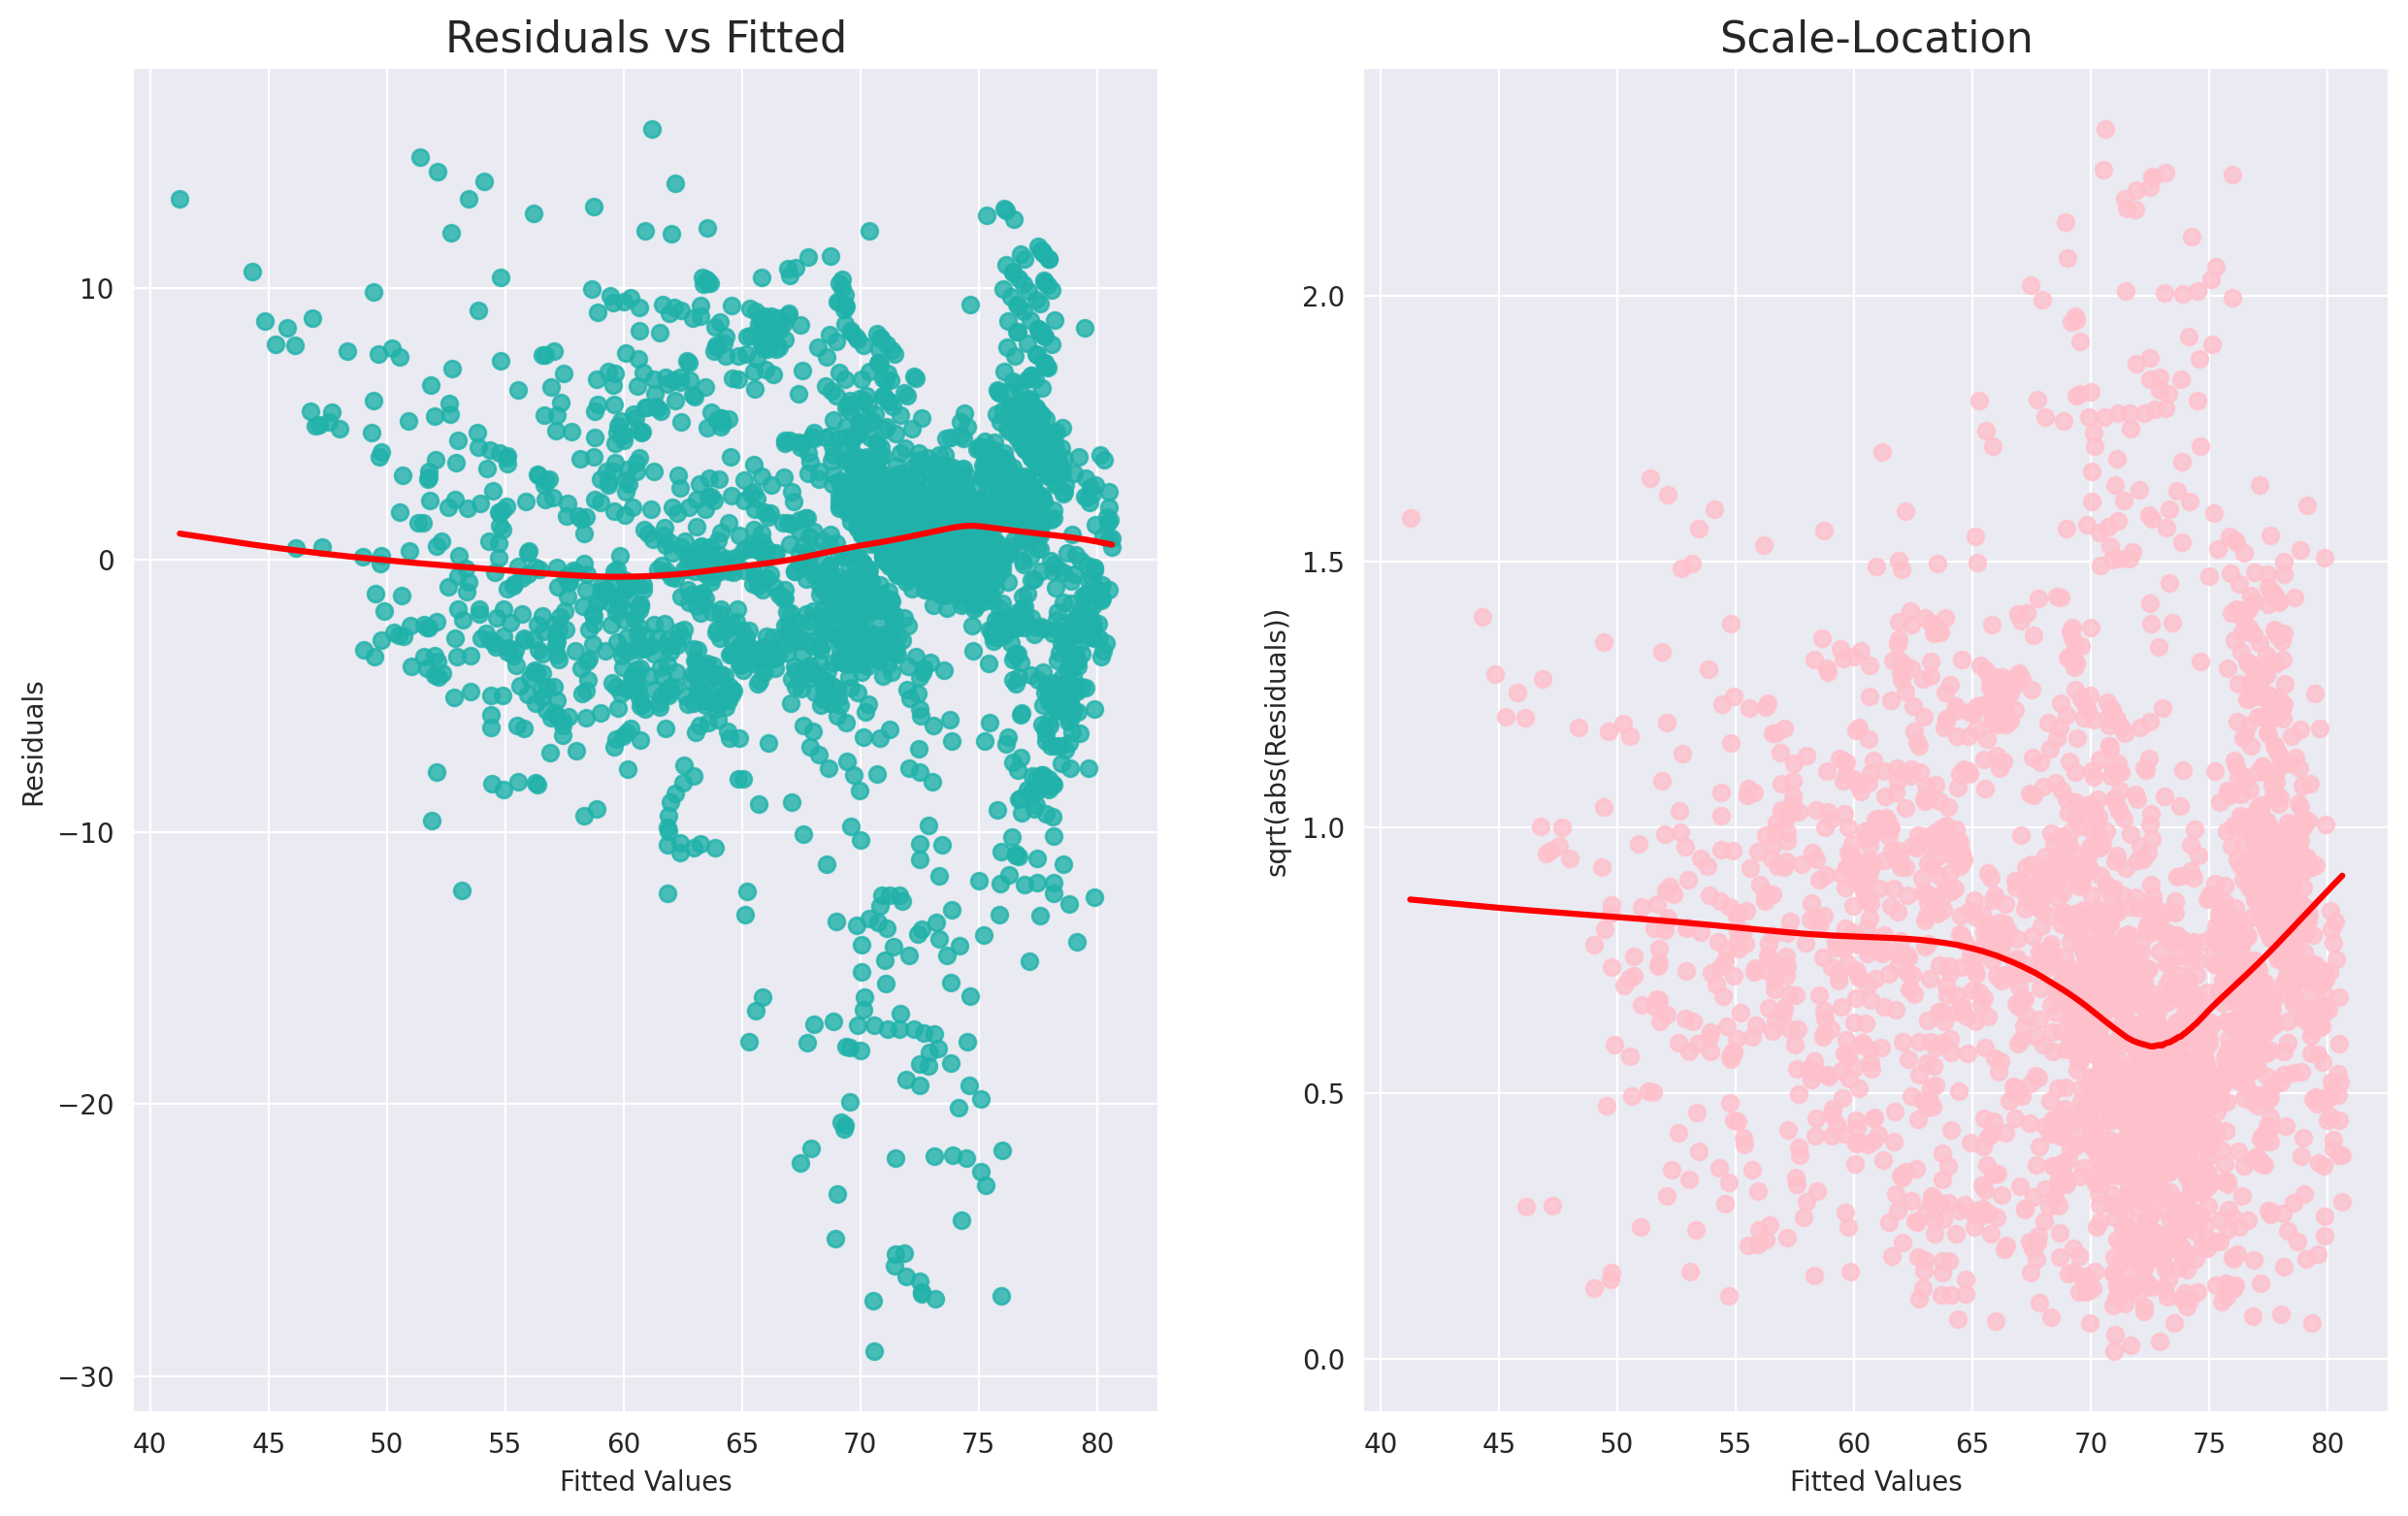

In [90]:
##Prueba de homocedasticidad ##


%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)




def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.

    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'}, scatter_kws={'color': 'lightseagreen'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'}, scatter_kws={'color': 'pink'} )
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog),
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

#Observamos que no ha homocedasticidad ya que la varianaza no es constante

In [91]:
 ##Relación entre variables y residuos  ##
##Correlación de Pearson para cada una de las variables
from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], lin_reg.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: Diphtheria  --- correlation: 0.0000, p-value: 1.0000
Variable: under-five deaths  --- correlation: -0.0000, p-value: 1.0000
Variable: Adult Mortality --- correlation: 0.0000, p-value: 1.0000
Variable:  thinness  1-19 years --- correlation: 0.0000, p-value: 1.0000
Variable: Total expenditure --- correlation: 0.0000, p-value: 1.0000
Variable: Country --- correlation: -0.0000, p-value: 1.0000


Jarque-Bera test ---- statistic: 2664.9916, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9176, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3405, p-value: 0.0000
Anderson-Darling test ---- statistic: 45.3497, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


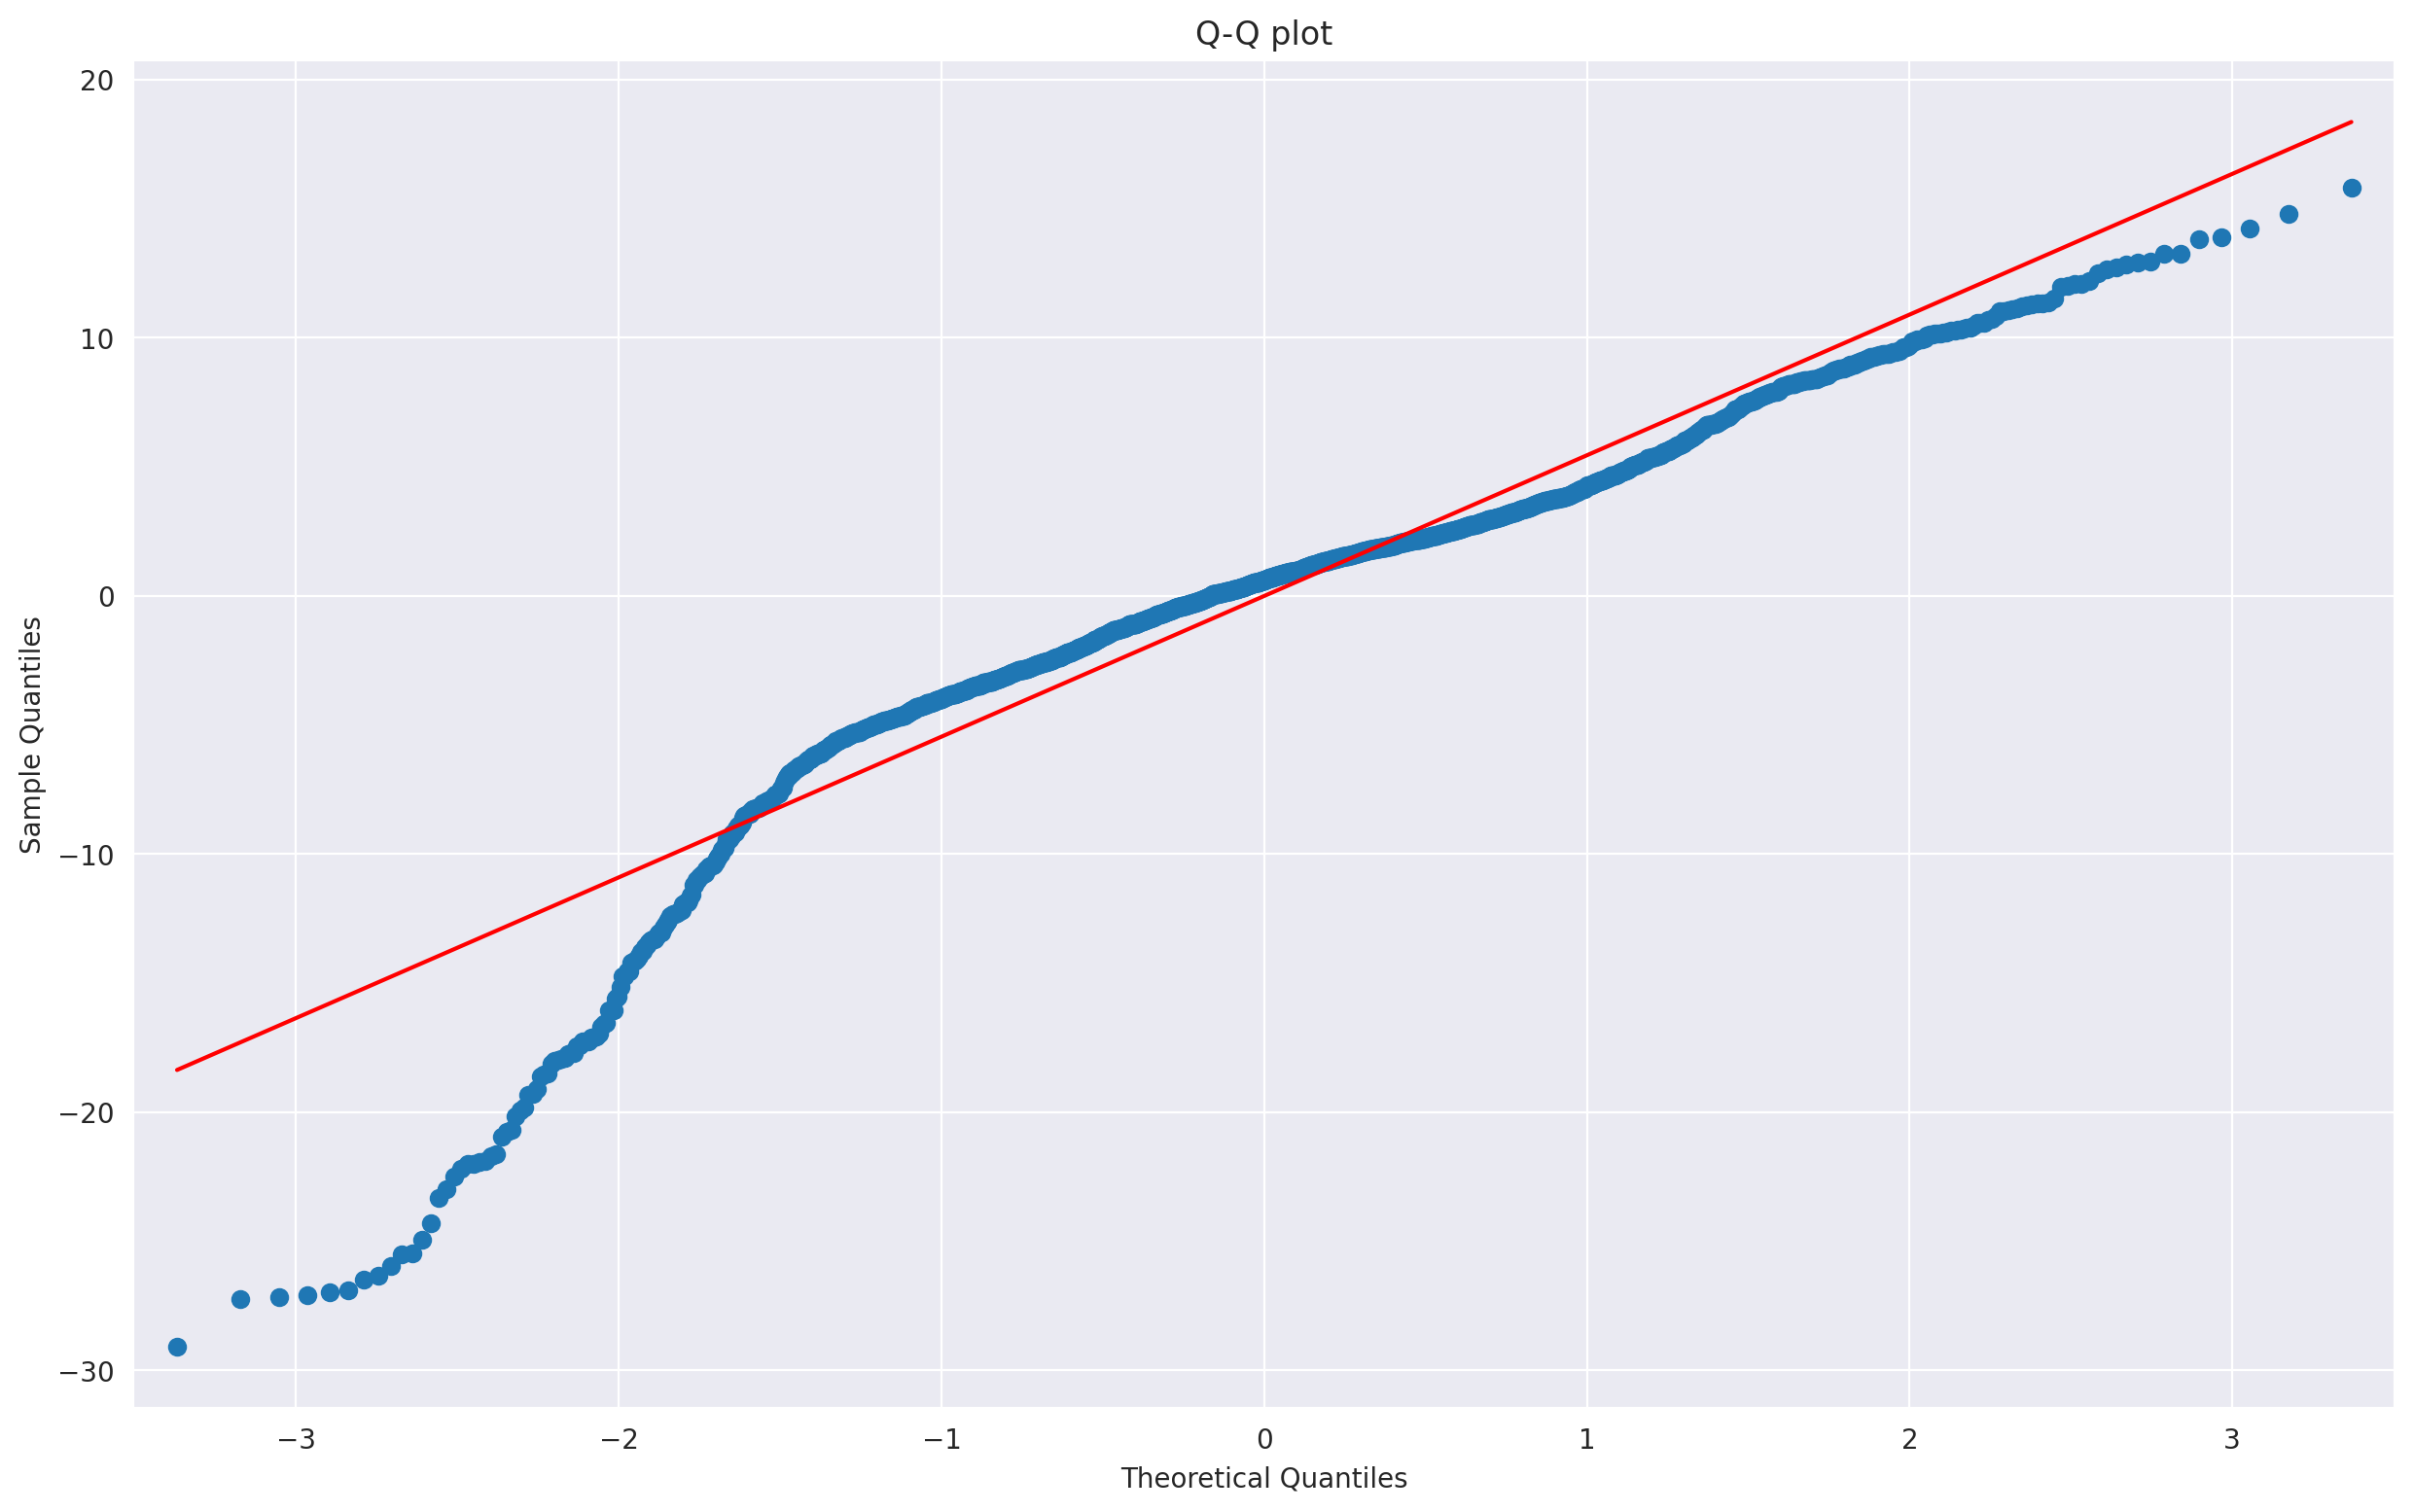

In [92]:
## Normallity of residuals  ##

from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to
    investigate the normality of residuals.

    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')

    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')

normality_of_residuals_test(lin_reg)

#**CONCLUSIÓN**

---



**De manera general podemos observar que nuestros supuestos del modelo de regresion lineal no se cumplen, como lo vimos en los residuos ya que tienen un comportamiento muy disperso y esto se traduce en que la varianza es heteroscedastica (no homosedastica) es decir, que no cumple con el supuesto de ruido blanco sobre las perturbaciones, y para esto podemos proponer basandonos en el poder de series de tiempo, lo cual nos ayuda a poder "estabilizar la varianza" y con ello lograr que las perturbaciones sean homoscedasticas aplicando transformaciones muy usuales en ST como lo son el logaritmo o la raiz cuadrada.**

**Asimismo, como no se cumplen los supuestos de normalidad de los residuales, nos da un indicio de que hace falta analizar el set de datos. Es claro que tenemos una recta sigmoide que ajusta los datos y por ende no podemos concluir de manera tan clara sobre la bondad del ajuste o que tan significativa es la variable independiente.**

**Ademas sugerimos un mejor tratamiento para los outliers ya que aun con lo realizado existen variables como 'under five deaths' que cuentan con muchos outliers.**